In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("admission_student.csv")
col = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'NURSERY']
df.columns=col

df.head()

,parents,has_nurs,form,children,housing,finance,social,health,NURSERY
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
3,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
4,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12959 entries, 0 to 12958
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12959 non-null  object
 1   has_nurs  12959 non-null  object
 2   form      12959 non-null  object
 3   children  12959 non-null  object
 4   housing   12959 non-null  object
 5   finance   12959 non-null  object
 6   social    12959 non-null  object
 7   health    12959 non-null  object
 8   NURSERY   12959 non-null  object
dtypes: object(9)
memory usage: 911.3+ KB


<AxesSubplot:xlabel='NURSERY', ylabel='count'>

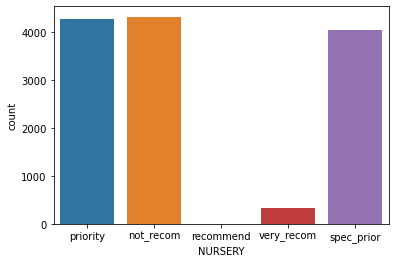

In [6]:
sns.countplot(data=df, x='NURSERY')

In [7]:
df['NURSERY'].value_counts()

not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        1
Name: NURSERY, dtype: int64

In [8]:
df['NURSERY'].value_counts(normalize=True) * 100

not_recom     33.335906
priority      32.919207
spec_prior    31.206112
very_recom     2.531059
recommend      0.007717
Name: NURSERY, dtype: float64

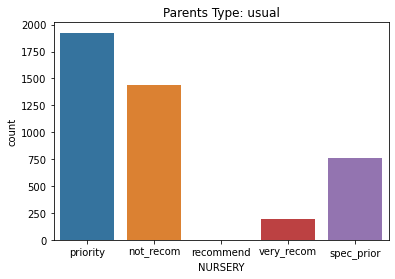

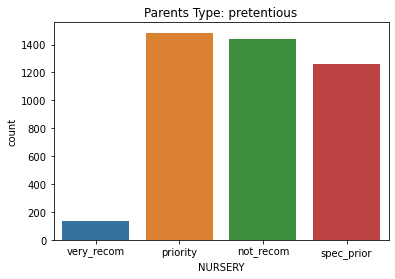

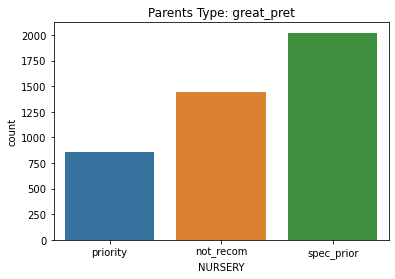

In [27]:
for i in df.parents.unique():
    temp_df = df[df.parents == i]
    sns.countplot(data = temp_df, x = 'NURSERY', saturation=0.7)
    plt.title('Parents Type: %s'%i)
    plt.show()

In [34]:
X = df.drop(columns='NURSERY')
y = df['NURSERY']
X_dum = pd.get_dummies(X, drop_first=True)
X_dum.head()

,parents_pretentious,parents_usual,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_completed,form_foster,form_incomplete,children_2,children_3,children_more,housing_critical,housing_less_conv,finance_inconv,social_problematic,social_slightly_prob,health_priority,health_recommended
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

y

array([1, 0, 2, ..., 3, 3, 0], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

log = LogisticRegression()

log.fit(X_train, y_train)

y_pred = log.predict(X_test)

accuracy_score(y_test, y_pred)


C:\Users\go27s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9324845679012346